# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [23]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm

Pretty printing has been turned ON


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [24]:
def conv_fn (x1, x2):
    len_x1 = len(x1)
    len_x2 = len(x2)
    
    #make the longer of the two signals s1, shorter one s2
    if (len_x1 > len_x2):
        s1 = x1
        s2 = x2
    else:
        s1 = x2
        s2 = x1
    
    #zero-pad the longer signal to make its length equal to n+m-1
    #remember: s1 is the longer of the two signals
    s1 = np.hstack ( (np.zeros(len(s2)-1), s1, np.zeros(len(s2)-1) ) )
    
    output = np.zeros(len_x1 + len_x2 - 1)
    
    #invert the shorter signal
    s2 = s2[::-1]
    
    for i in range(0, len(output)):
        frontPad = np.zeros(i)
        backPad = np.zeros(len(s1) - i - len(s2))
        shifted_s2 = np.hstack( (frontPad, s2, backPad))
        
        output[i] = np.sum( np.multiply(s1, shifted_s2) )
 
    return(output)
    

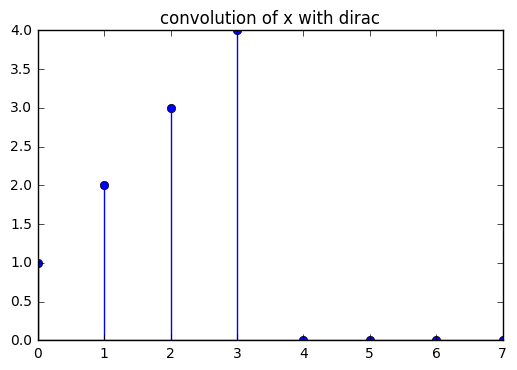

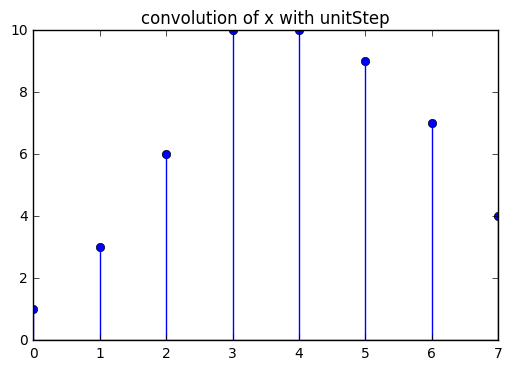

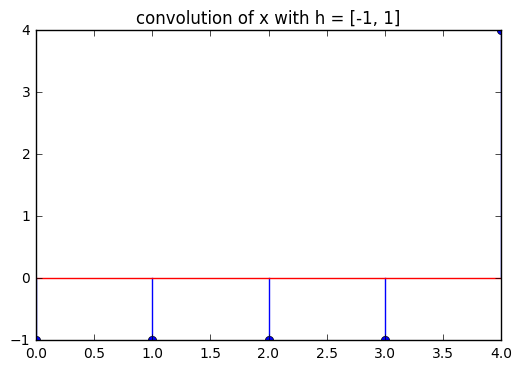

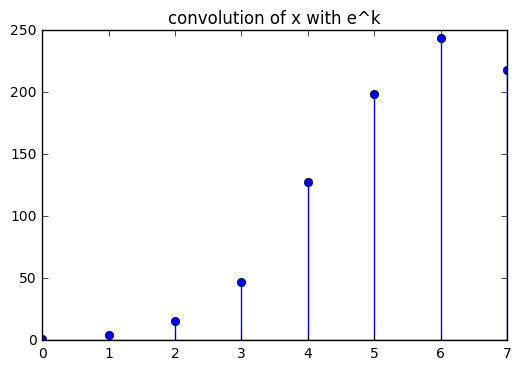

In [25]:
x = [1,2,3,4]

#create signals
dirac = [1,0,0,0,0]
unitStep = [1,1,1,1,1]
h = [-1, 1]

n = 5
ek = np.zeros(n)
for i in range(0, n):
    ek[i] = np.exp(i)

#convolve x with created signals
x_dirac = conv_fn(x, dirac)
x_unitStep = conv_fn(x, unitStep)
x_h = conv_fn(x, h)
x_ek = conv_fn(x, ek)

#plot the results
plt.figure()
plt.stem(x_dirac)
plt.title('convolution of x with dirac')

#plot the results
plt.figure()
plt.stem(x_unitStep)
plt.title('convolution of x with unitStep')

#plot the results
plt.figure()
plt.stem(x_h)
plt.title('convolution of x with h = [-1, 1]')

#plot the results
plt.figure()
plt.stem(x_ek)
plt.title('convolution of x with e^k')


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [26]:
def conv2d(image, kernel):
    #get dimensions of image and kernel
    m_image, n_image = image.shape
    m_kernel, n_kernel = kernel.shape
    
    #ensure that the kernel is square 
    if (m_kernel != n_kernel):
        print ('Error! Kernel has to be square')
        return(0)
    
    #make sure that the image is bigger than the kernel
    if (m_kernel >= m_image) or (n_kernel >= n_image):
        print('Error! Image has to be bigger than the kernel')
        return(0)
    else:
        #start with zero padding the image
        padbed = np.zeros((m_image + m_kernel -1, n_image + n_kernel -1))
        
        rstart = (m_kernel - 1)/2
        rend = rstart + m_image
        
        cstart = (n_kernel - 1)/2
        cend = cstart + n_image
        
        padbed[rstart:rend, cstart:cend] = image
        output = np.zeros(image.shape)
        
        #build the output image one pixel at a time
        for r in range (0, m_image):
            for c in range (0, n_image):
                imregion = padbed[r:r+m_kernel, c:c+n_kernel ]
                output[r][c] = np.sum(np.multiply(kernel, imregion))
                
        
        return(output)


In [31]:
#create the gaussian kernel
k = (1.0/256)* np.matrix( [ [1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1] ] )

#read grayscale lena image from disk
lena_image = io.imread('/home/ghimire/Desktop/DSP-TP-1617/Lab3/images/lena-grey.bmp')

#convolve lena image with gaussian kernel
k_lena = conv2d(lena_image, k)




('size of lena-grey =', (512, 512))
('size of convolution output = ', (512, 512))


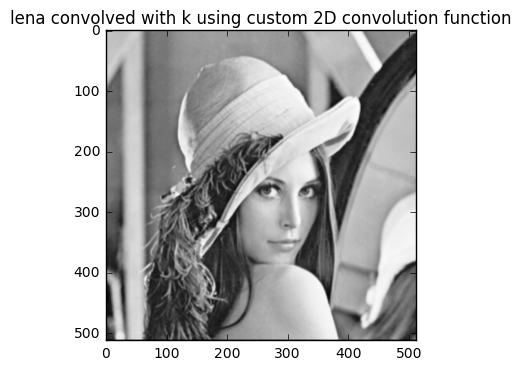

In [32]:
#show the output of convolving lena with the given kernel k
plt.figure()
plt.imshow(k_lena, cmap = 'Greys_r')
plt.title('lena convolved with k using custom 2D convolution function') 

#verify that output and input images are indeed of the same sizes
print ('size of lena-grey =', lena_image.shape)
print ('size of convolution output = ', k_lena.shape)

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

In [29]:
#find binary of the signal-image and the query image using otsu method
#use python's correlation to check if the binary of the query image is
#present in the binary of the signal-image

In [72]:
from skimage import color
from skimage import filters

query_signal = io.imread('/home/ghimire/Desktop/DSP-TP-1617/Lab3/images/a.png')
query_signal= color.rgb2grey(query_signal)
otsu_query_signal = filters.threshold_otsu(query_signal)
query_signal_bw = (query_signal< otsu_query_signal).astype(bool)


large_signal = io.imread('/home/ghimire/Desktop/DSP-TP-1617/Lab3/images/text.png')
large_signal = color.rgb2grey(large_signal)
otsu_large_signal = filters.threshold_otsu(query_signal)
large_signal_bw = (large_signal < otsu_large_signal).astype(int)

from scipy.signal import correlate2d
crossCorrelation = correlate2d(large_signal_bw, query_signal_bw,  mode='full', boundary='fill', fillvalue=0)



('a detected at : ', 38, 150)
('a detected at : ', 64, 144)
('a detected at : ', 116, 175)
('a detected at : ', 142, 96)
('a detected at : ', 142, 169)
('a detected at : ', 168, 130)
('a detected at : ', 194, 23)
('a detected at : ', 220, 138)
('a detected at : ', 246, 103)
('a detected at : ', 246, 160)
('a detected at : ', 298, 41)
('total number of detections = ', 11)


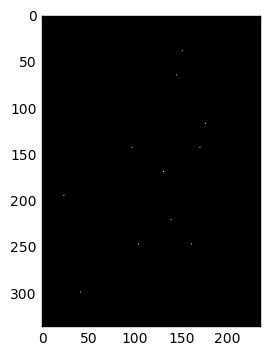

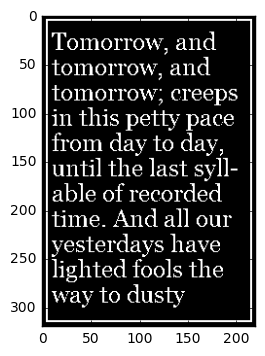

In [89]:
#display results from computation of correlation
maxCorr = np.max(crossCorrelation)
crossCorrelation_bw = crossCorrelation >= (0.90*maxCorr)


plt.figure()
plt.imshow(crossCorrelation_bw, cmap = 'Greys_r')



#print locations of detections
rows, cols = large_signal.shape

totalDetections = 0
for row in range(0, rows):
    for col in range (0, cols):
        if (crossCorrelation_bw[row][col] > 0):
            print ('a detected at : ', row, col)
            totalDetections = totalDetections + 1
            
print ('total number of detections = ', totalDetections )

#plot the large signal (complete text) for inspection
plt.figure()
plt.imshow(large_signal_bw, cmap = 'Greys_r' )